# Analyse the output of count_events.py

In [1]:
#import python packages
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import oskar

### Import data

In [2]:
rid = '20160424_115511'
h5 = oskar.H5Data(rid)              # data
out_dire = h5.out_dire("Count")     # output
# log 
h5.load_log()
logDF = h5.log
vDF = h5.var_df()
uDF = h5.unique_df()
# count data
channels = ['CH_A0', 'CH_A1']
eventDF = h5.load_count(channels, include_vars=True)

In [3]:
eventDF.head()

trigger         width       amp  squid  rep        DLY_EA  \
FTYPE EVENT                                                                   
CH_A0 0      7.860000e-07  7.260000e-07  0.088722      1    1  6.350000e-07   
      1      1.590000e-06  4.200000e-08  0.009707      1    1  6.350000e-07   
      2      3.984000e-06  6.000000e-08  0.017290      1    1  6.350000e-07   
      3      4.992000e-06  4.200000e-08  0.013464      1    1  6.350000e-07   
      4      5.466000e-06  4.200000e-08  0.009707      1    1  6.350000e-07   

               DLY_GA      IR  VOL_u101  VOL_u104  
FTYPE EVENT                                        
CH_A0 0      0.000001  756.77       200      2200  
      1      0.000001  756.77       200      2200  
      2      0.000001  756.77       200      2200  
      3      0.000001  756.77       200      2200  
      4      0.000001  756.77       200      2200

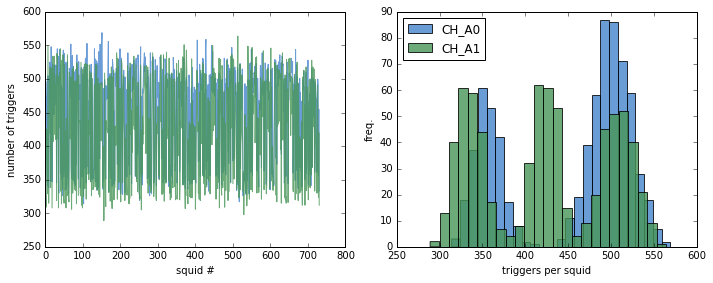

In [4]:
# number of triggers
fig, ax = plt.subplots(1, 2, figsize=(10,4))
for i, chan in enumerate(channels):
    tmp = eventDF.loc[chan]
    squids = []
    triggers = []
    for sq, val in tmp.groupby('squid'):
        squids.append(sq)
        ntrigs = len(val.index)
        triggers.append(ntrigs)
    ax[0].plot(squids, triggers, alpha=0.8, color=oskar.colors[i%7])
    ax[1].hist(triggers, 25, alpha=0.8, color=oskar.colors[i%7], label=chan)

ax[0].set_xlabel('squid #')
ax[0].set_ylabel('number of triggers')
ax[1].set_xlabel('triggers per squid')
ax[1].set_ylabel('freq.')
ax[1].legend(loc=0)
plt.tight_layout()
plt.show()

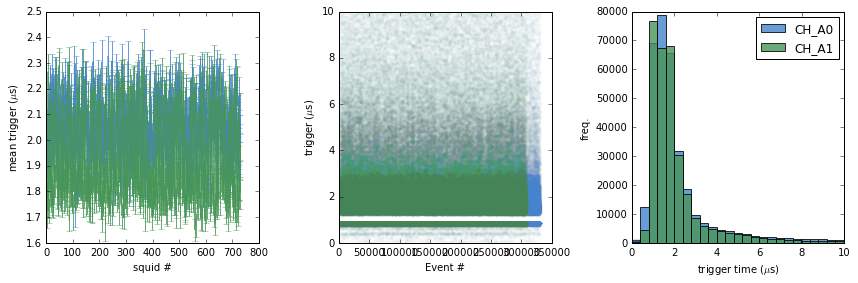

In [5]:
# trigger time
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i, chan in enumerate(channels):
    tmp = eventDF.loc[chan]
    squids = []
    trig_av = []
    trig_stderr = []
    for sq, val in tmp.groupby('squid'):
        squids.append(sq)
        ntrigs = len(val.index)
        trig_av.append(val.trigger.mean())
        trig_stderr.append(val.trigger.std()/ np.sqrt(ntrigs))
    ax[0].errorbar(squids, np.array(trig_av) * 1e6, yerr=np.array(trig_stderr) * 1e6, alpha=0.8, label=chan, color=oskar.colors[i%7])
    ax[1].plot(tmp.index, tmp.trigger * 1e6, '.', alpha=0.01, label=chan, color=oskar.colors[i%7])
    ax[2].hist(tmp.trigger * 1e6, 25, alpha=0.8, label=chan, color=oskar.colors[i%7])
ax[0].set_xlabel(r'squid #')
ax[0].set_ylabel('mean trigger ($\mu$s)')
ax[1].set_xlabel(r'Event #')
ax[1].set_ylabel('trigger ($\mu$s)')
ax[2].set_xlabel(r'trigger time ($\mu$s)')
ax[2].set_ylabel('freq.')
ax[2].legend(loc=0)
plt.tight_layout()
plt.show()

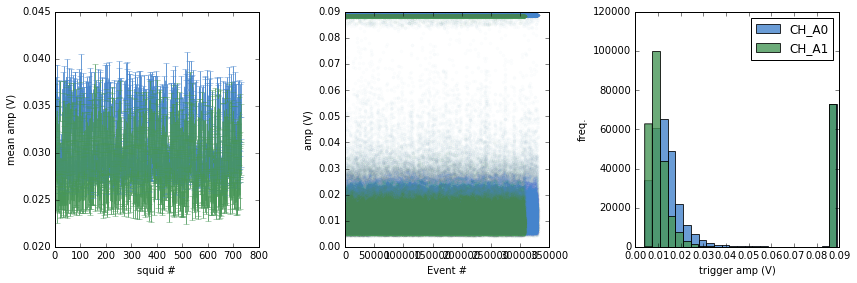

In [6]:
# trigger amplitude
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i, chan in enumerate(channels):
    tmp = eventDF.loc[chan]
    squids = []
    amp_av = []
    amp_stderr = []
    for sq, val in tmp.groupby('squid'):
        squids.append(sq)
        ntrigs = len(val.index)
        amp_av.append(val.amp.mean())
        amp_stderr.append(val.amp.std()/ np.sqrt(ntrigs))
    ax[0].errorbar(squids, np.array(amp_av), yerr=np.array(amp_stderr), alpha=0.8, label=chan, color=oskar.colors[i%7])
    ax[1].plot(tmp.index, tmp.amp, '.', alpha=0.01, label=chan, color=oskar.colors[i%7])
    ax[2].hist(tmp.amp, 25, alpha=0.8, label=chan, color=oskar.colors[i%7])
ax[0].set_xlabel(r'squid #')
ax[0].set_ylabel('mean amp (V)')
ax[1].set_xlabel(r'Event #')
ax[1].set_ylabel('amp (V)')
ax[2].set_xlabel(r'trigger amp (V)')
ax[2].set_ylabel('freq.')
ax[2].legend(loc=0)
plt.tight_layout()
plt.show()

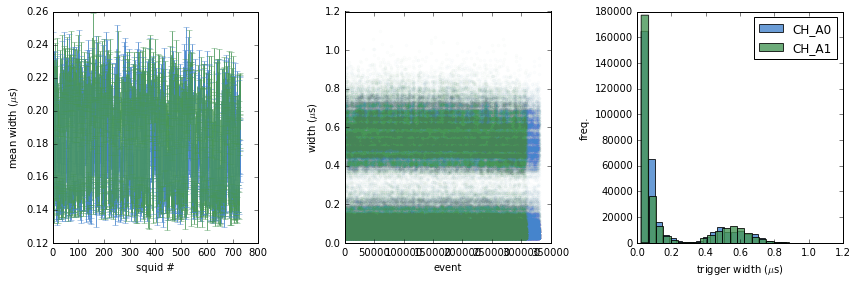

In [7]:
# trigger width
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i, chan in enumerate(channels):
    tmp = eventDF.loc[chan]
    squids = []
    width_av = []
    width_stderr = []
    for sq, val in tmp.groupby('squid'):
        squids.append(sq)
        ntrigs = len(val.index)
        width_av.append(val.width.mean())
        width_stderr.append(val.width.std()/ np.sqrt(ntrigs))
    ax[0].errorbar(squids, np.array(width_av)*1e6, yerr=np.array(width_stderr)*1e6, alpha=0.8, label=chan, color=oskar.colors[i%7])
    ax[1].plot(tmp.index, tmp.width*1e6, '.', alpha=0.01, label=chan, color=oskar.colors[i%7])
    ax[2].hist(tmp.width*1e6, 25, alpha=0.8, label=chan, color=oskar.colors[i%7])
ax[0].set_xlabel(r'squid #')
ax[0].set_ylabel('mean width ($\mu$s)')
ax[1].set_xlabel(r'event')
ax[1].set_ylabel('width ($\mu$s)')
ax[2].set_xlabel(r'trigger width ($\mu$s)')
ax[2].set_ylabel('freq.')
ax[2].legend(loc=0)
plt.tight_layout()
plt.show()

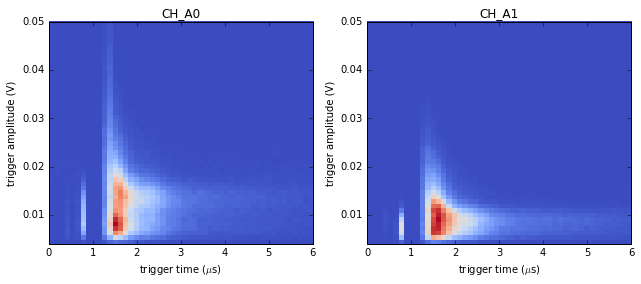

In [8]:
# trigger time and amp
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
i = 0
for chan in channels:
    tmp = eventDF.loc[chan]
    ax[i].hist2d(tmp.trigger * 1e6, tmp.amp, 50, range=np.array([(0.0, 6.0), (0.004, 0.05)]),
                 label=chan, cmap='coolwarm')
    ax[i].set_xlabel(r'trigger time ($\mu$s)')
    ax[i].set_ylabel('trigger amplitude (V)')
    ax[i].set_title(chan)
    i = i + 1
plt.tight_layout()
plt.show()

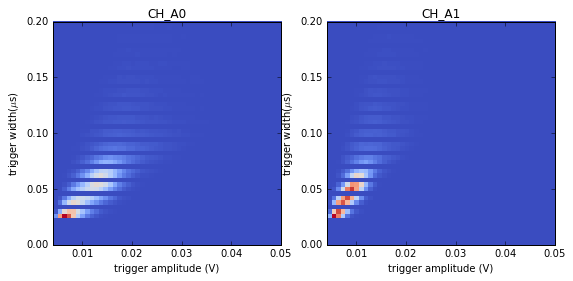

In [9]:
# trigger amp and width
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
i = 0
for chan in channels:
    tmp = eventDF.loc[chan]
    ax[i].hist2d(tmp.amp, tmp.width * 1e6, 50, range=np.array([(0.004, 0.05), (0, 0.2)]),
                 label=chan, cmap='coolwarm')
    ax[i].set_ylabel(r'trigger width($\mu$s)')
    ax[i].set_xlabel('trigger amplitude (V)')
    ax[i].set_title(chan)
    i = i + 1
plt.show()